In [15]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
%cd /content/drive/MyDrive/Math_6397/CH01

/content/drive/MyDrive/Math_6397/CH01


In [21]:
#(a) 
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

X = scipy.io.loadmat(os.path.join('..','DATA','VORTALL.mat'))
data=X['VORTALL']

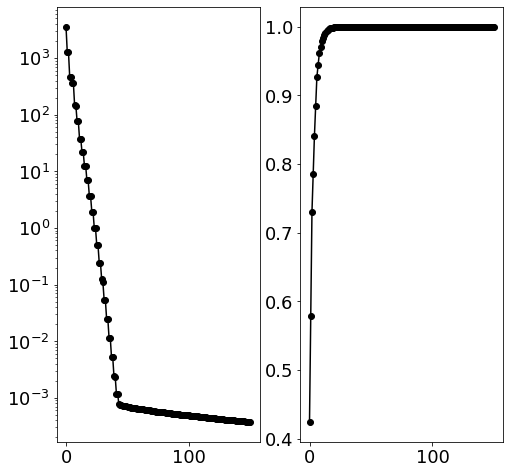

In [22]:
[U,S,V]= np.linalg.svd(data,full_matrices=0)
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')    #singular value spectra
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')

In [23]:
def plotFlow(X):    
    ## Plot Mode 2
    vortmin = -5
    vortmax = 5
    V2 = np.copy(np.real(np.reshape(X,(449,199))))
    V2 = V2.T

    # normalize values... not symmetric
    minval = np.min(V2)
    maxval = np.max(V2)

    if np.abs(minval) < 5 and np.abs(maxval) < 5:
        if np.abs(minval) > np.abs(maxval):
            vortmax = maxval
            vortmin = -maxval
        else:
            vortmin = minval
            vortmax = -minval

    V2[V2 > vortmax] = vortmax
    V2[V2 < vortmin] = vortmin

    plt.imshow(V2,cmap='jet',vmin=vortmin,vmax=vortmax)

    cvals = np.array([-4,-2,-1,-0.5,-0.25,-0.155])
    plt.contour(V2,cvals*vortmax/5,colors='k',linestyles='dashed',linewidths=1)
    plt.contour(V2,np.flip(-cvals)*vortmax/5,colors='k',linestyles='solid',linewidths=0.4)

    plt.scatter(49,99,5000,color='k') # draw cylinder

    #plt.show()

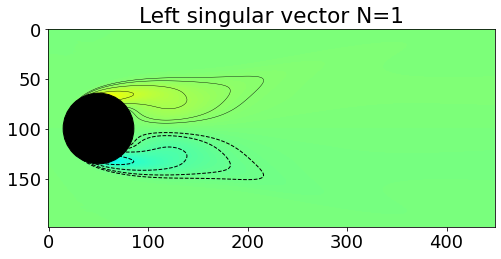

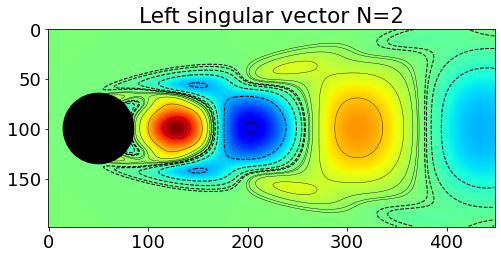

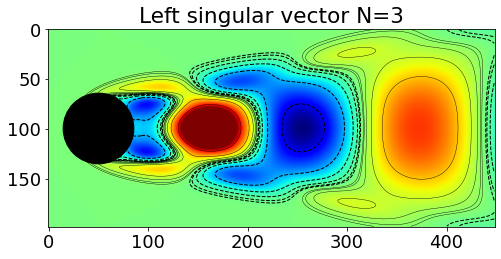

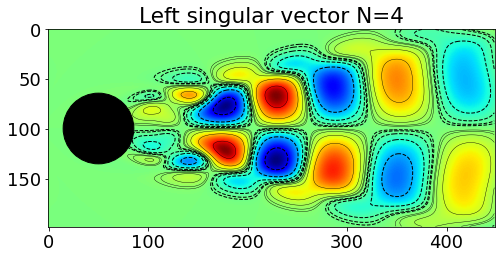

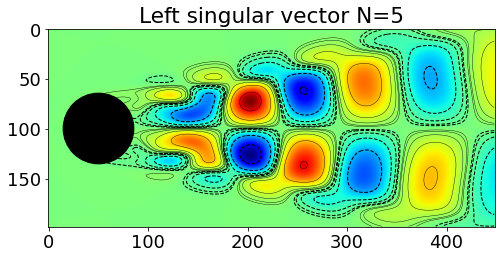

In [24]:
for i in range(5):
    plt.title('Left singular vector N=' + str(i+1))
    plotFlow(U[:,i])
    plt.show()

In [7]:
#prime factor of shape of U
num=89351;
for i in range(1, num+1):
    if(num % i) == 0:
        print(i, end=' ')

1 199 449 89351 

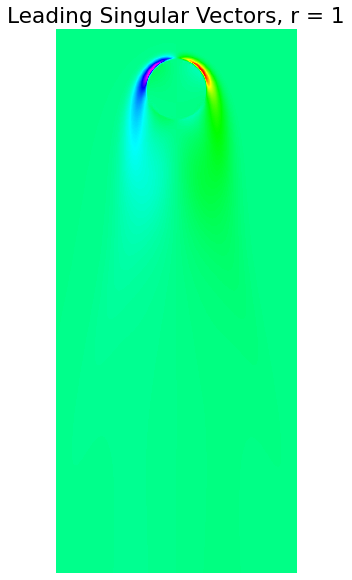

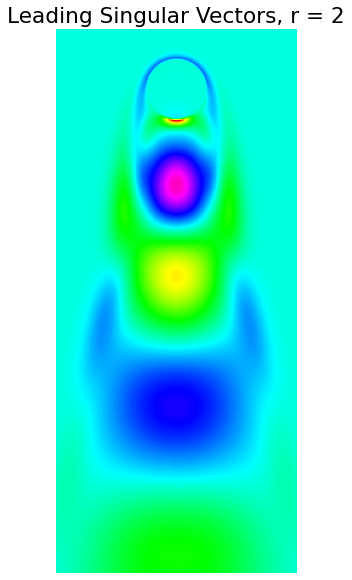

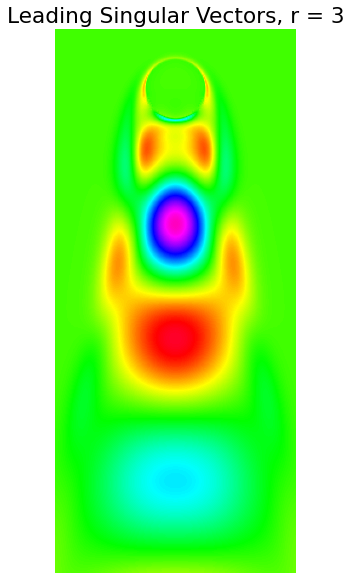

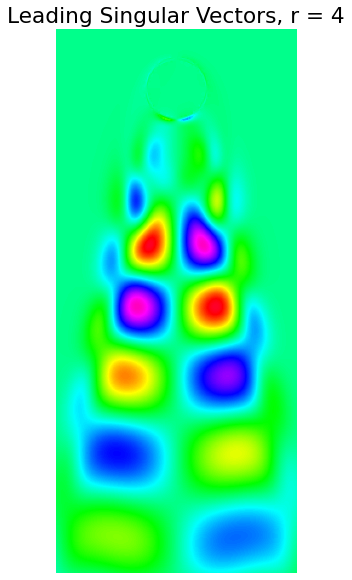

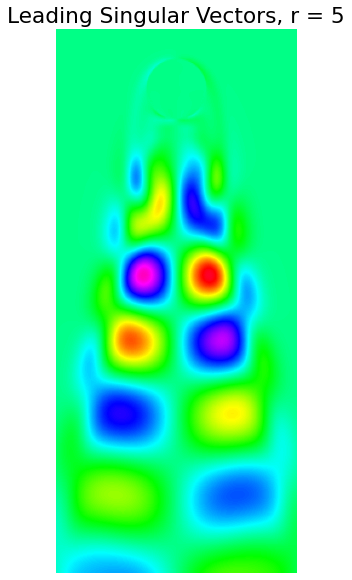

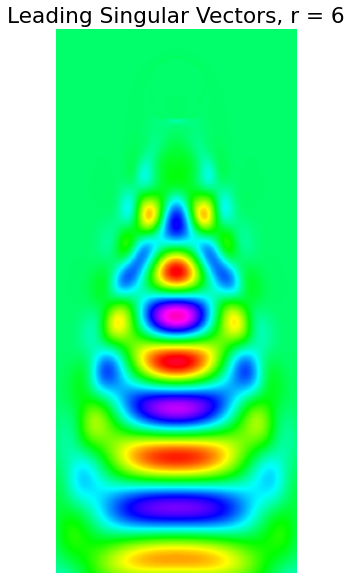

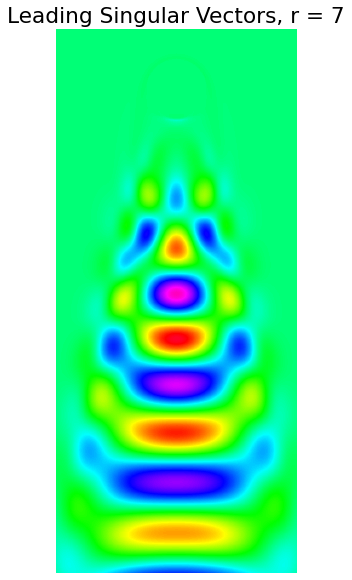

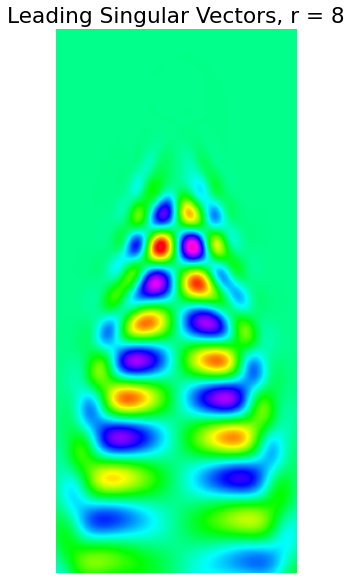

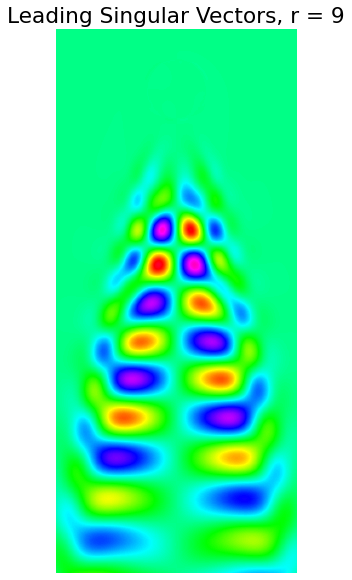

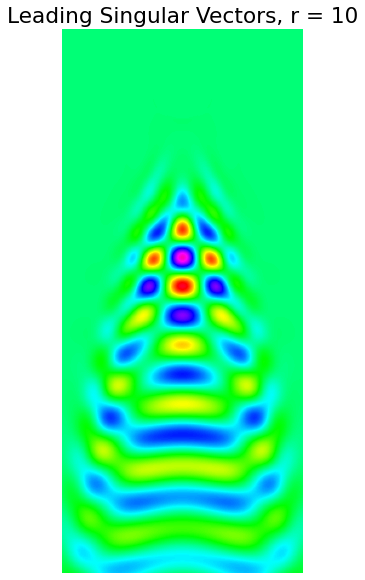

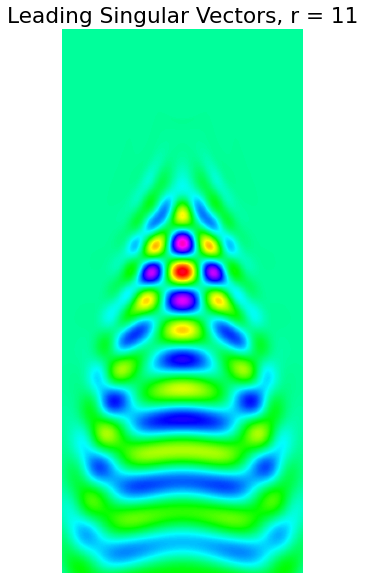

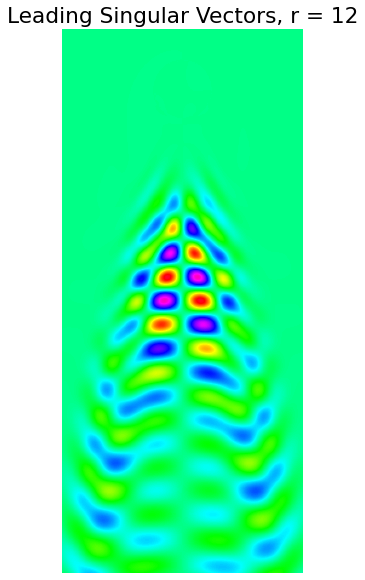

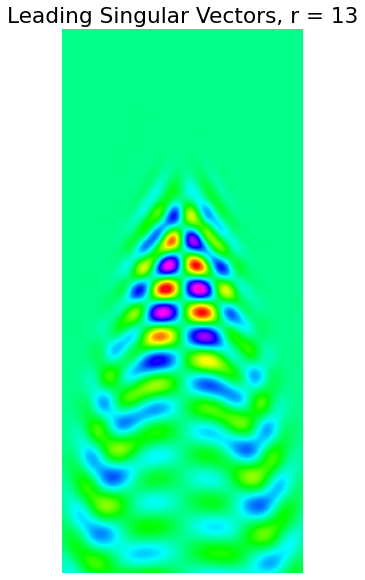

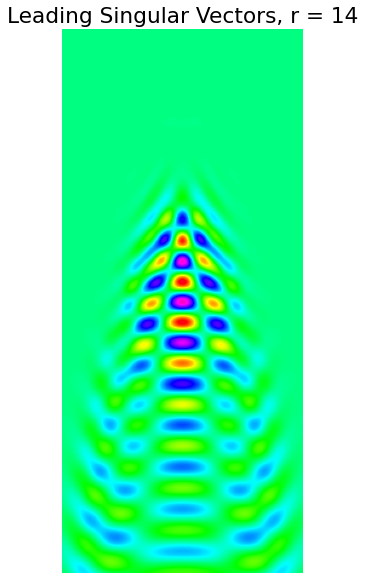

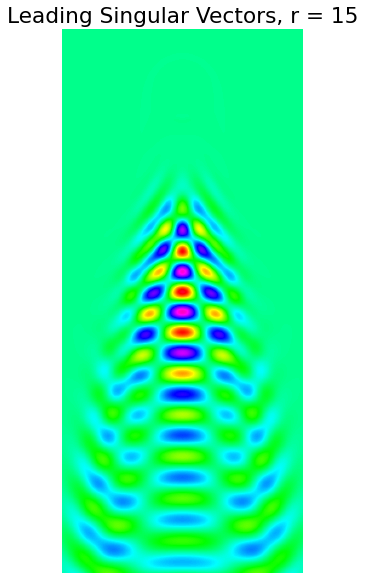

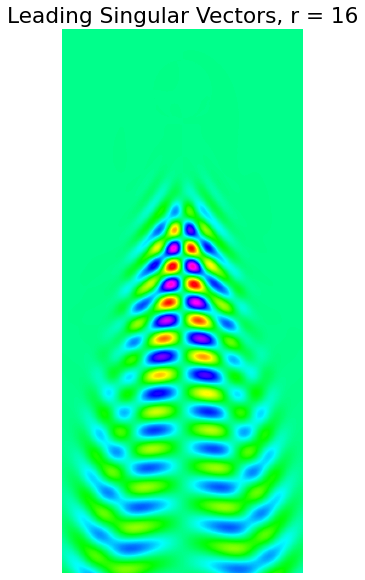

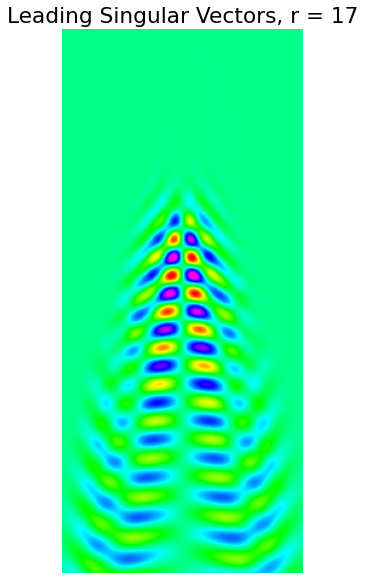

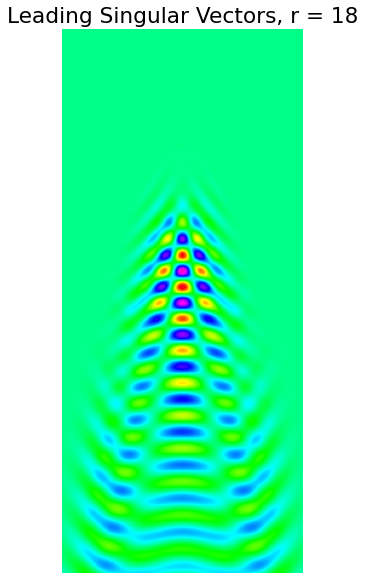

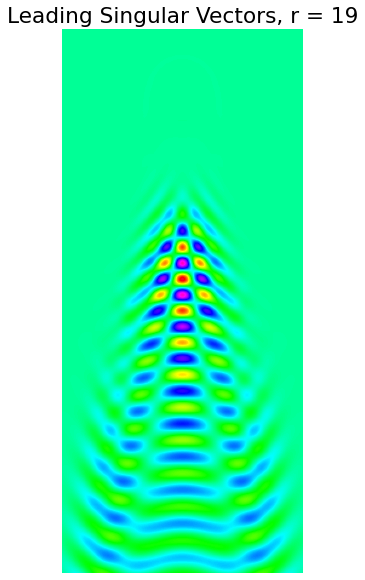

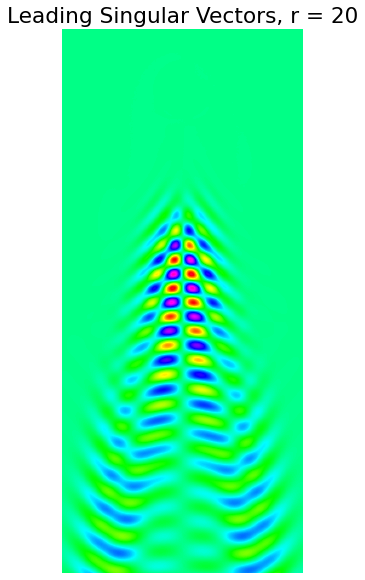

In [8]:
#leading singular vectors

for j in range(20):
    lead_vec=np.reshape(U[:,j],(449,199))
    plt.figure(j+1)
    j += 1
    img = plt.imshow(lead_vec)
    plt.axis('off')
    plt.set_cmap("gist_rainbow")
    plt.title('Leading Singular Vectors, r = ' + str(j))
    plt.show()

In [37]:
import imageio
def createMovie(X):
    plt.rcParams['figure.figsize'] = [8, 8]
    filenames = []
    for i in range(150):
        plotFlow(X[:,i])
        filename = './pics/full'+str(i)+'.png'
        filenames.append(filename)
        plt.savefig(filename)
        plt.close()
    with imageio.get_writer('vortices.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.v2.imread(filename)
            writer.append_data(image)
    for filename in set(filenames):
        os.remove(filename)

FileNotFoundError: ignored

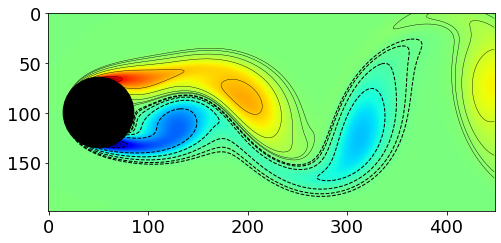

In [38]:
createMovie(data)

In [30]:
X_fro = np.linalg.norm(data, 'fro')

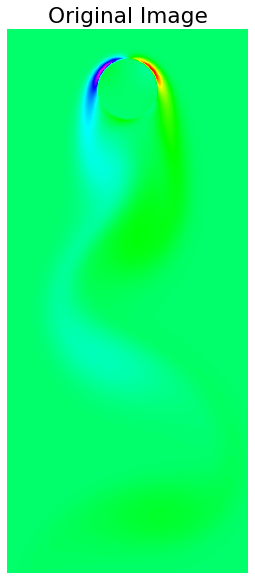

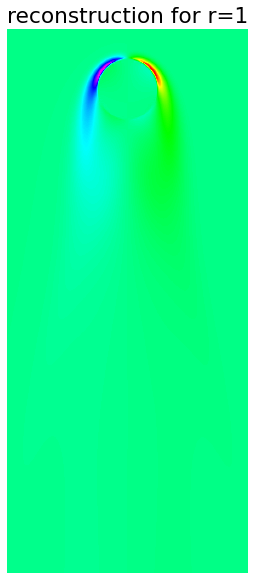

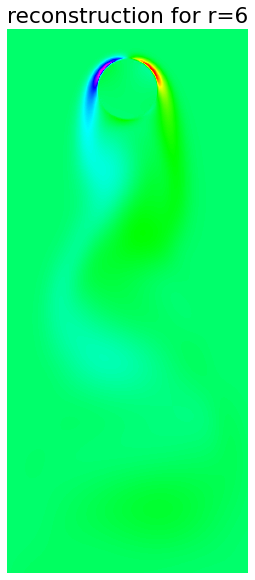

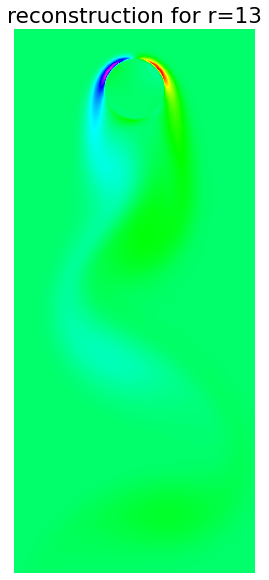

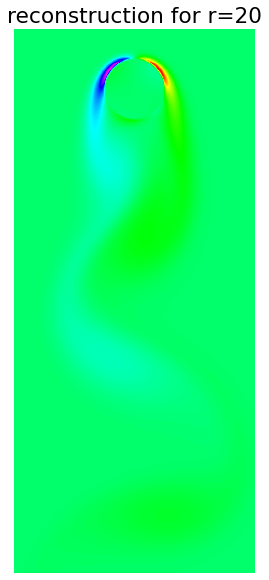

In [9]:
# (b)

j=10; #number of fluid field among 151 total column
plt.imshow(np.reshape(data[:,j],(449,199)))
plt.set_cmap('gist_rainbow')
plt.title('Original Image')
plt.axis('off')
plt.show()

for r in (1, 6, 13, 20):
  st=np.diag(S)
  # Construct truncated image
  Xr = U[:,:r] @ st[:r,:r] @ V[:r,:]
  Xrr=np.reshape(Xr[:,j],(449,199))  #the first column of the flow field

  np.shape(Xrr)
  plt.imshow(Xrr)
  plt.set_cmap('gist_rainbow')
  plt.title('reconstruction for r=' + str(r))
  plt.axis('off')
  plt.show()

In [31]:

cdS = np.cumsum(S) / np.sum(S) # Cumulative energy
r90 = np.min(np.where(cdS > 0.90)) # Find r to capture 90% energy
r99 = np.min(np.where(cdS > 0.99)) # Find r to capture 99% energy
r99_point_9 = np.min(np.where(cdS > 0.999)) # Find r to capture 99.9% energy

print(r90)
print(r99)
print(r99_point_9)

6
13
20


Means, minimum value of r needs to be 6 to capture 90% energy. Similarly to capture 99%n and 99.9% energy minimum corresponding value of r needs to be 13 and 20.

In [32]:
#Frobenius norm of error
er=np.linalg.norm(data-Xr, 'fro')/ np.linalg.norm(data, 'fro')
sq_er=er*er
print(er,sq_er)

0.0011638904610382663 1.354641005295868e-06


FileNotFoundError: ignored

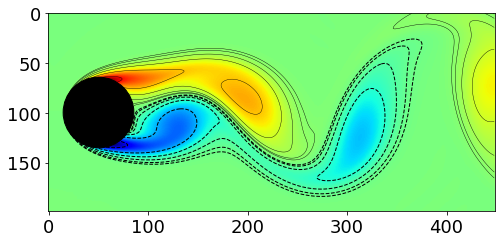

In [34]:
createMovie(Xr)

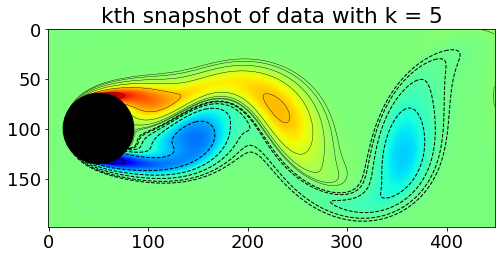

In [41]:
k = 5
plt.title('kth snapshot of data with k = ' + str(i+1))
plotFlow(data[:,k])
plt.show()

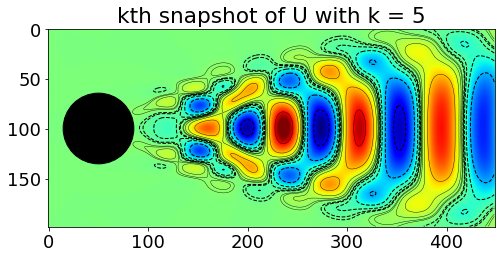

In [42]:
k = 5
plt.title('kth snapshot of U with k = ' + str(i+1))
plotFlow(U[:,k])
plt.show()

In [44]:
SVT = st @ V
m = 20
W = SVT[:,:m-1]
W_prime = SVT[:,1:m]

WU, WS, WVT = np.linalg.svd(W, full_matrices=False) 

In [46]:
WS_diag = np.diag(WS)
W_pinv = WVT.transpose() @ np.linalg.inv(WS_diag) @ WU.transpose()
A = W_prime @ W_pinv

eig_A = np.linalg.eig(A)

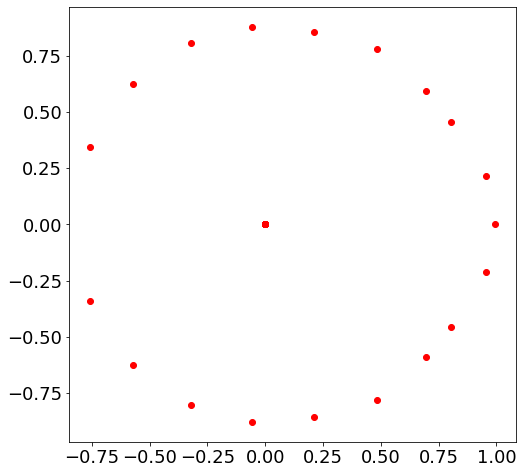

In [47]:
X = [x.real for x in eig_A[0]]
Y = [x.imag for x in eig_A[0]]
plt.scatter(X,Y, color='red')
plt.show()

In [48]:
w_old = SVT[:,:1]
w_ii = SVT[:,:1]
SVT_new = SVT[:,:1]
for i in range(1,151):
    w_new = A @ w_old
    SVT_new = np.append(SVT_new, w_new, axis=1)
    w_old = w_new

In [49]:
X_new = U @ SVT_new

FileNotFoundError: ignored

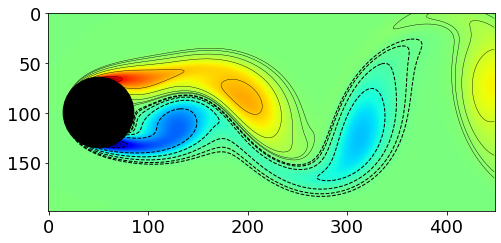

In [50]:
createMovie(X_new)